## Modelo del Sistema
- Transmisión binaria: $H = 0$ o $H = 1$ (equiprobables)
- Señal recibida:
  - Si $H = 0$: $Y = -1 + Z$
  - Si $H = 1$: $Y = 2 + Z$
- Donde $Z \sim \mathcal{N}(0, 2)$ (ruido gaussiano)

## Funciones de Densidad de Probabilidad
- $Y|H=0 \sim \mathcal{N}(-1, 2)$
- $Y|H=1 \sim \mathcal{N}(2, 2)$

Por lo tanto:
- $f_{Y|H}(y|0) = \frac{1}{\sqrt{4\pi}} \exp\left(-\frac{(y+1)^2}{4}\right)$
- $f_{Y|H}(y|1) = \frac{1}{\sqrt{4\pi}} \exp\left(-\frac{(y-2)^2}{4}\right)$

## Nivel de Decisión Óptimo
Aplicando el criterio MAP (Maximum A Posteriori) para hipótesis equiprobables:

$$\frac{f_{Y|H}(y|1)}{f_{Y|H}(y|0)} \stackrel{H=1}{\gtrless}_{H=0} 1$$

Desarrollando y simplificando:
- $\exp\left(-\frac{(y-2)^2}{4} + \frac{(y+1)^2}{4}\right) \stackrel{H=1}{\gtrless}_{H=0} 1$
- $-\frac{(y-2)^2}{4} + \frac{(y+1)^2}{4} \stackrel{H=1}{\gtrless}_{H=0} 0$
- $6y - 3 \stackrel{H=1}{\gtrless}_{H=0} 0$
- $y \stackrel{H=1}{\gtrless}_{H=0} \frac{1}{2}$

Por tanto, el umbral óptimo es $\gamma = \frac{1}{2}$.

## Probabilidad de Error
- $P(error|H=0) = P(Y > \gamma | H=0) = Q\left(\frac{\gamma+1}{\sqrt{2}}\right)$
- $P(error|H=1) = P(Y < \gamma | H=1) = Q\left(\frac{2-\gamma}{\sqrt{2}}\right)$

Con $\gamma = \frac{1}{2}$:
- $P_e = \frac{1}{2}Q\left(\frac{3/2}{\sqrt{2}}\right) + \frac{1}{2}Q\left(\frac{3/2}{\sqrt{2}}\right) = Q\left(\frac{3}{2\sqrt{2}}\right) \approx Q(1.061)$

Donde $Q(x) = \frac{1}{2}(1-erf(x/\sqrt{2}))$ es la función Q.

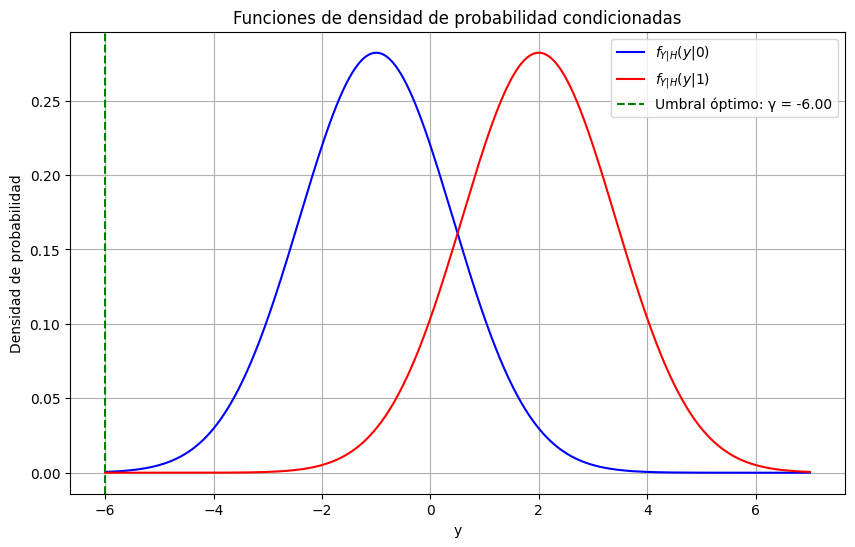

El nivel de decisión óptimo es: γ = -6.0000
El nivel de decisión óptimo teórico es: γ = 0.5
Probabilidad de error para H=0: 0.1444
Probabilidad de error para H=1: 0.1444
Probabilidad de error total: 0.1444
Valor de Q(1.0607) = 0.1444
Valor de Q(1.0607) = 0.1444


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Definición de las funciones de densidad condicional
def f_Y_given_H0(y):
    # Y|H=0 ~ N(-1,2)
    return (1/np.sqrt(4*np.pi)) * np.exp(-((y+1)**2)/4)

def f_Y_given_H1(y):
    # Y|H=1 ~ N(2,2)
    return (1/np.sqrt(4*np.pi)) * np.exp(-((y-2)**2)/4)

# Rango de valores para graficar
y_values = np.linspace(-6, 7, 1000)

# Calcular los valores de las funciones de densidad
pdf_h0 = f_Y_given_H0(y_values)
pdf_h1 = f_Y_given_H1(y_values)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(y_values, pdf_h0, 'b-', label='$f_{Y|H}(y|0)$')
plt.plot(y_values, pdf_h1, 'r-', label='$f_{Y|H}(y|1)$')

# Determinar el punto de intersección
# Punto donde las densidades son iguales
intersection_idx = np.argmin(np.abs(pdf_h0 - pdf_h1))
y_threshold = y_values[intersection_idx]
plt.axvline(x=y_threshold, color='g', linestyle='--', label=f'Umbral óptimo: γ = {y_threshold:.2f}')

plt.title('Funciones de densidad de probabilidad condicionadas')
plt.xlabel('y')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"El nivel de decisión óptimo es: γ = {y_threshold:.4f}")

# También podemos calcular el umbral teórico
# Para equiprobables, el umbral es donde las densidades son iguales
# Resolviendo (y+1)²/4 = (y-2)²/4 obtenemos y = 0.5
print(f"El nivel de decisión óptimo teórico es: γ = 0.5")

# Cálculo de la probabilidad de error
def Q_function(x):
    return 0.5 * (1 - erf(x / np.sqrt(2)))

# Para el umbral γ = 0.5
gamma = 0.5

# Probabilidad de error para H=0 (P(Y > γ|H=0))
P_e_given_H0 = Q_function((gamma - (-1))/np.sqrt(2))

# Probabilidad de error para H=1 (P(Y < γ|H=1))
P_e_given_H1 = Q_function((2 - gamma)/np.sqrt(2))

# Probabilidad de error total (asumiendo P(H=0) = P(H=1) = 0.5)
P_e = 0.5 * (P_e_given_H0 + P_e_given_H1)

print(f"Probabilidad de error para H=0: {P_e_given_H0:.4f}")
print(f"Probabilidad de error para H=1: {P_e_given_H1:.4f}")
print(f"Probabilidad de error total: {P_e:.4f}")
print(f"Valor de Q({(gamma+1)/np.sqrt(2):.4f}) = {P_e_given_H0:.4f}")
print(f"Valor de Q({(2-gamma)/np.sqrt(2):.4f}) = {P_e_given_H1:.4f}")